In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as yy
from matplotlib import dates as pm
import numpy as np
yy.use("ggplot")

In [2]:
data2020=pd.read_csv("weather.csv")
datadec=pd.read_csv("weatherDec2019.csv")

merging the year 2020 with december of 2019

In [3]:
data=pd.merge(datadec,data2020,how="outer")

In [4]:
data.date=pd.to_datetime(data.date)

In [5]:
begin=pd.to_datetime("2019-12-22")
end=pd.to_datetime("2020-12-21")

return the dates from 2019-12-22 to 2020-12-21 - four seasons (winter,spring,summer,fall)

In [6]:
four_seasons=data.loc[(data.date<=end) & (data.date>= begin),
~data.columns.isin(["Unnamed: 8" ,"wdirection"]) ]

In [7]:
four_seasons

,date,time,temp,wspeed,humidity,pressure,visibility
519,2019-12-22,00:00,7,0.0,61,1023,4.0
520,2019-12-22,01:00,6,0.0,71,1022,4.0
521,2019-12-22,02:00,6,0.0,57,1022,5.0
522,2019-12-22,03:00,6,0.0,61,1022,5.0
523,2019-12-22,04:00,6,0.0,66,1022,5.0
...,...,...,...,...,...,...,...
9172,2020-12-21,19:00,15,7.0,51,1021,6.0
9173,2020-12-21,20:00,14,17.0,51,1022,6.0
9174,2020-12-21,21:00,14,11.0,55,1022,6.0
9175,2020-12-21,22:00,14,9.0,55,1022,6.0


droping times with minutes

In [8]:
four_seasons=four_seasons[four_seasons.time.str.contains(r":00")]

In [9]:
four_seasons

,date,time,temp,wspeed,humidity,pressure,visibility
519,2019-12-22,00:00,7,0.0,61,1023,4.0
520,2019-12-22,01:00,6,0.0,71,1022,4.0
521,2019-12-22,02:00,6,0.0,57,1022,5.0
522,2019-12-22,03:00,6,0.0,61,1022,5.0
523,2019-12-22,04:00,6,0.0,66,1022,5.0
...,...,...,...,...,...,...,...
9172,2020-12-21,19:00,15,7.0,51,1021,6.0
9173,2020-12-21,20:00,14,17.0,51,1022,6.0
9174,2020-12-21,21:00,14,11.0,55,1022,6.0
9175,2020-12-21,22:00,14,9.0,55,1022,6.0


there is 364 day * 24 hour = 8763 hour a year; we have 8492 hours, this means there is 8763-8492=244 missing hours which means missing records as well, the equivalent of around ten days.

In [10]:
days=four_seasons.groupby("date").count()
days[days.time<=24].count()

time          366
temp          366
wspeed        366
humidity      366
pressure      366
visibility    366
dtype: int64

In [11]:
four_seasons.isnull().sum()

date            0
time            0
temp            0
wspeed         10
humidity        0
pressure        0
visibility    242
dtype: int64

In [12]:
four_seasons[four_seasons.wspeed.isnull()]

,date,time,temp,wspeed,humidity,pressure,visibility
1303,2020-01-22,19:00,6,NaN,81,1021,5.0
3626,2020-04-28,07:00,12,NaN,62,1012,5.0
3628,2020-04-28,09:00,17,NaN,42,1013,6.0
3629,2020-04-28,10:00,19,NaN,40,1013,6.0
3642,2020-04-28,23:00,16,NaN,55,1012,8.0
3643,2020-04-29,00:00,15,NaN,59,1012,8.0
3645,2020-04-29,05:00,12,NaN,82,1012,8.0
3663,2020-04-30,12:00,22,NaN,29,1015,7.0
5910,2020-08-04,22:00,25,NaN,47,1010,7.0
7310,2020-10-03,20:00,22,NaN,61,1017,5.0


In [13]:
four_seasons=four_seasons.ffill()

In [14]:
four_seasons.isnull().sum()

date          0
time          0
temp          0
wspeed        0
humidity      0
pressure      0
visibility    0
dtype: int64

In [15]:
pd.options.display.float_format="{:.2f}".format
four_seasons.describe()

,temp,wspeed,humidity,pressure,visibility
count,8492.00,8492.00,8492.00,8492.00,8492.00
mean,19.01,10.03,54.66,1015.10,6.60
std,8.68,8.81,24.10,4.39,3.36
min,0.00,0.00,3.00,1000.00,0.00
25%,11.00,0.00,35.00,1012.00,5.00
50%,19.00,9.00,54.00,1015.00,6.00
75%,26.00,15.00,76.00,1018.00,7.00
max,42.00,74.00,100.00,1030.00,16.00


In [16]:
jan=four_seasons[four_seasons.date.dt.month==1]

In [17]:
result=(jan.pivot_table(index="time",columns=jan.date.dt.date,values="temp")).fillna(method="bfill")
result

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31
time,,,,,,,,,,,,,,,,,,,,,
00:00,5.00,7.00,8.00,7.00,7.00,7.00,8.00,7.00,6.00,6.00,...,5.00,5.00,7.00,2.00,3.00,5.00,6.00,8.00,8.00,8.00
01:00,5.00,7.00,8.00,7.00,7.00,6.00,7.00,6.00,7.00,6.00,...,4.00,5.00,7.00,2.00,2.00,4.00,7.00,8.00,7.00,7.00
02:00,5.00,7.00,7.00,6.00,7.00,6.00,7.00,6.00,6.00,6.00,...,4.00,5.00,7.00,3.00,2.00,3.00,6.00,8.00,7.00,9.00
03:00,5.00,6.00,7.00,6.00,7.00,5.00,6.00,6.00,6.00,6.00,...,4.00,5.00,7.00,2.00,2.00,3.00,5.00,8.00,7.00,9.00
04:00,4.00,6.00,7.00,6.00,7.00,4.00,6.00,6.00,5.00,6.00,...,4.00,4.00,7.00,3.00,2.00,3.00,5.00,8.00,7.00,8.00
05:00,4.00,6.00,8.00,5.00,7.00,4.00,6.00,6.00,6.00,5.00,...,4.00,4.00,7.00,2.00,2.00,2.00,5.00,8.00,6.00,8.00
06:00,5.00,6.00,8.00,5.00,7.00,4.00,6.00,6.00,5.00,5.00,...,4.00,5.00,7.00,2.00,2.00,2.00,4.00,8.00,6.00,8.00
07:00,6.00,5.00,8.00,6.00,6.00,4.00,6.00,6.00,5.00,6.00,...,4.00,5.00,6.00,2.00,2.00,2.00,4.00,8.00,5.00,8.00
08:00,6.00,6.00,7.00,4.00,7.00,4.00,6.00,6.00,5.00,5.00,...,4.00,5.00,5.00,3.00,3.00,3.00,4.00,8.00,7.00,8.00


heatmap showing the temperature at all times during January

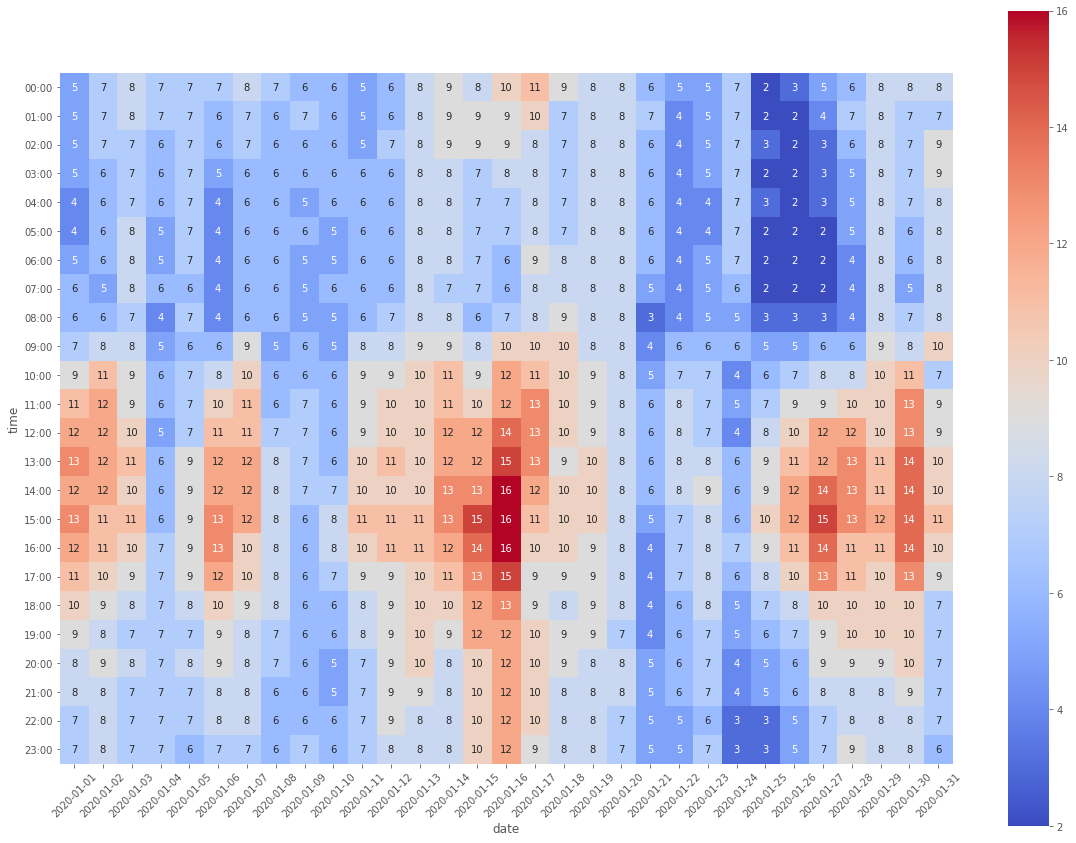

In [18]:
fig,ax=plt.subplots(figsize=(20,15))
x=sns.heatmap(result,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

In [19]:
four_seasons.temp.mean()

19.010715967969855

histogram plot of hourly temperatures all year round and january contribution

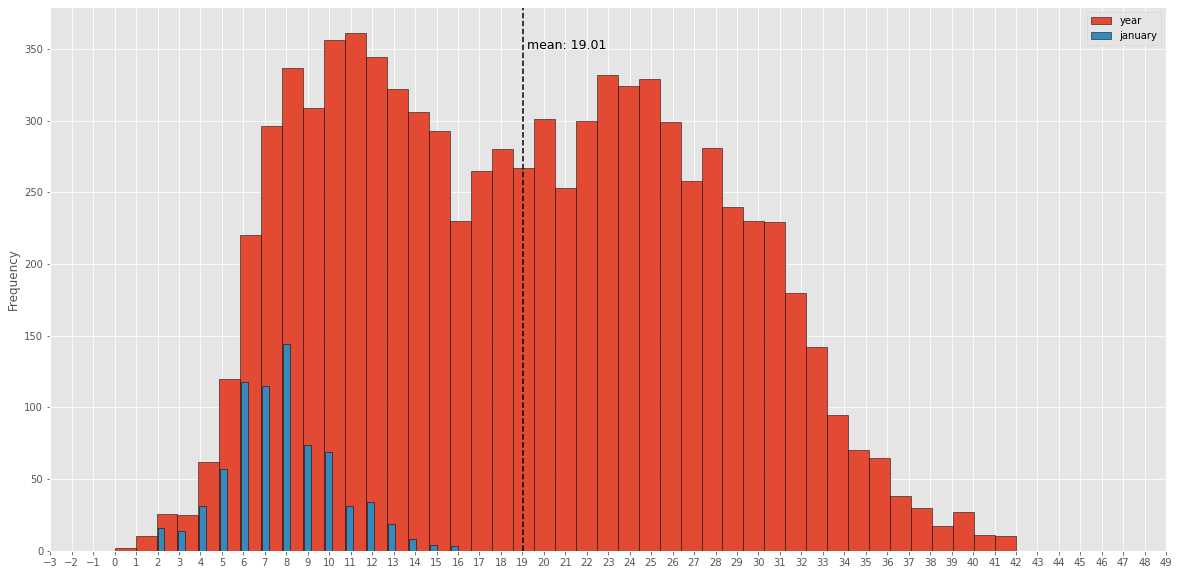

In [20]:
four_seasons.temp.plot.hist(bins=43,figsize=(20,15),edgecolor="black",label="year")
jan.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="january")
plt.xticks(range(-3,50))
# four_seasons.temp.value_counts().sort_index().plot()
plt.axvline(four_seasons.temp.mean(), color="k",linestyle="dashed")
plt.text(19.2,350,"mean: 19.01", fontsize=12.5)
plt.legend()

minimum, maximum and mean temperatures for each day during January

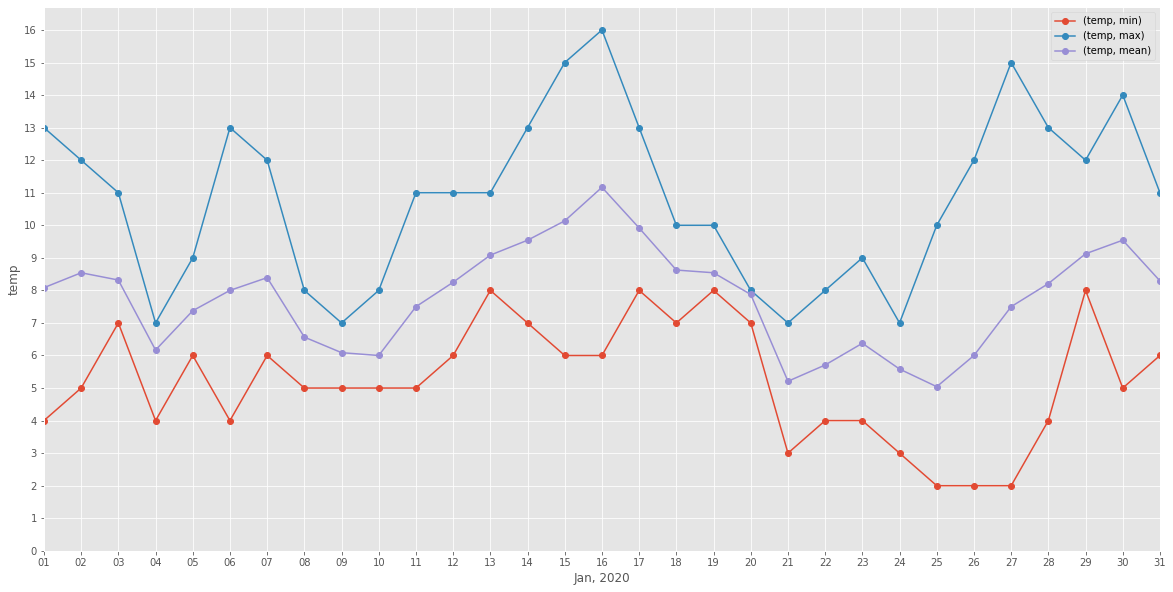

In [21]:
jan.groupby("date").agg({"temp":["min","max","mean"]}).plot(figsize=(20,10),marker="o")
plt.xticks(pd.date_range(start=("2020-1-1"),end=("2020-1-31")))
dataf=pm.DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(dataf)
plt.yticks(range(17))
plt.xlabel("Jan, 2020")
plt.ylabel("temp")
plt.legend()

## ..............................................................................................
correlation map which shows a positive relationship between (temperature, visibility),(pressure, humidity) and a negative relastionship between (temperature, humidity),(temperature, pressure)

<AxesSubplot:>

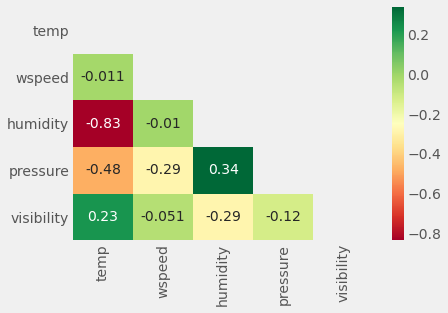

In [22]:
# yy.use("seaborn-ticks")
yy.use("fivethirtyeight")
correlation=four_seasons.corr()
upper=np.triu(correlation)
sns.heatmap(correlation,annot=True,cmap="RdYlGn",mask=upper)

scale down pressure values for better visuals

In [23]:
four_seasons.pressure=four_seasons.pressure-1000

subplots for positive and negative correlations on a monthly basis. humidity and temperature have a perfect inverse relationship

<AxesSubplot:xlabel='date'>

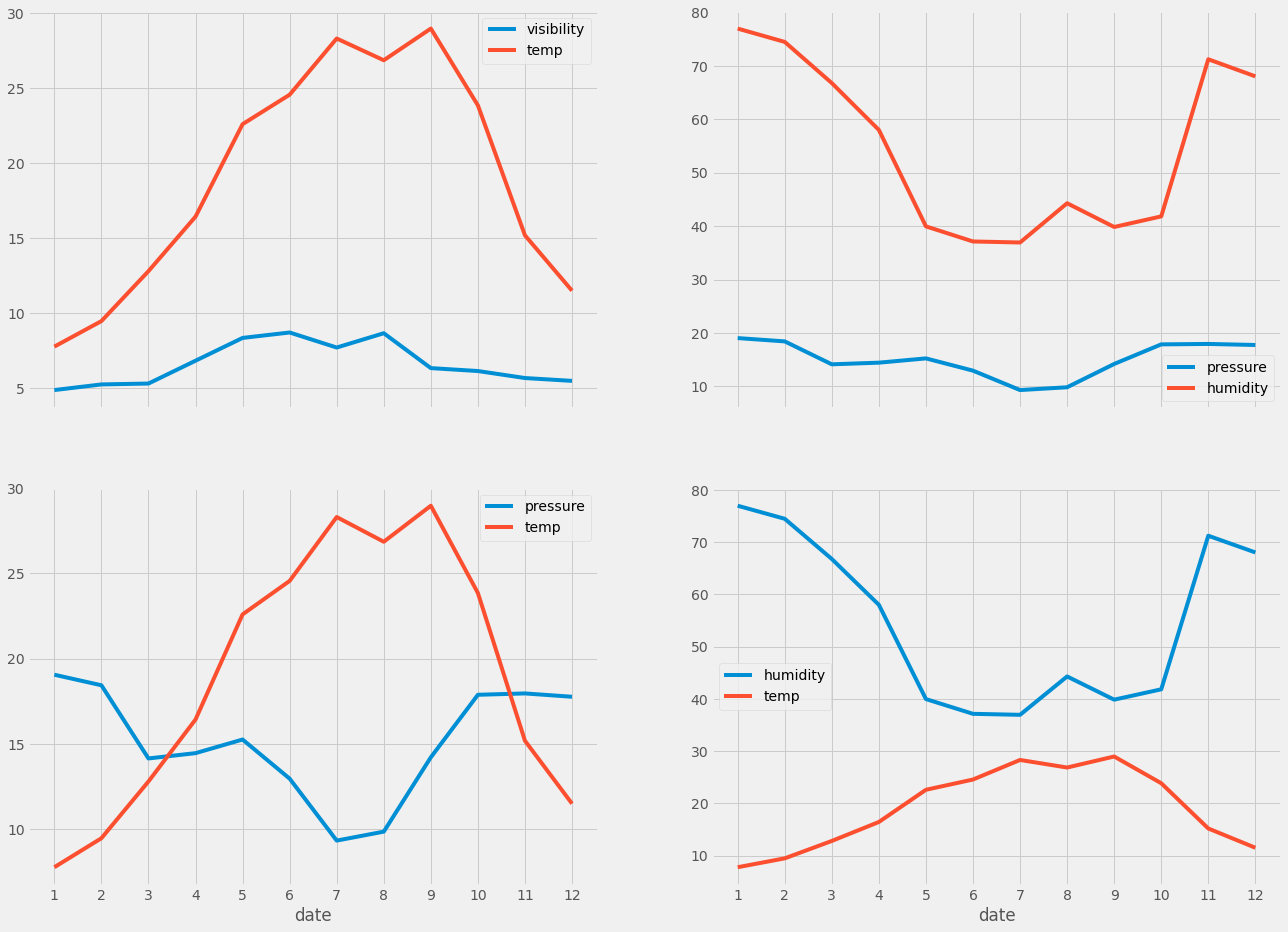

In [24]:
# yy.use("tableau-colorblind10")
fig, axes= plt.subplots(2,2,sharex=True,figsize=(20,15))
plt.xticks(range(0,13))
group=four_seasons.groupby(four_seasons.date.dt.month).mean()
group[["visibility","temp"]].plot(ax=axes[0,0])
group[["pressure","humidity"]].plot(ax=axes[0,1])
group[["pressure","temp"]].plot(ax=axes[1,0])
group[["humidity","temp"]].plot(ax=axes[1,1])

line scatter chart for each season and for all four seasons

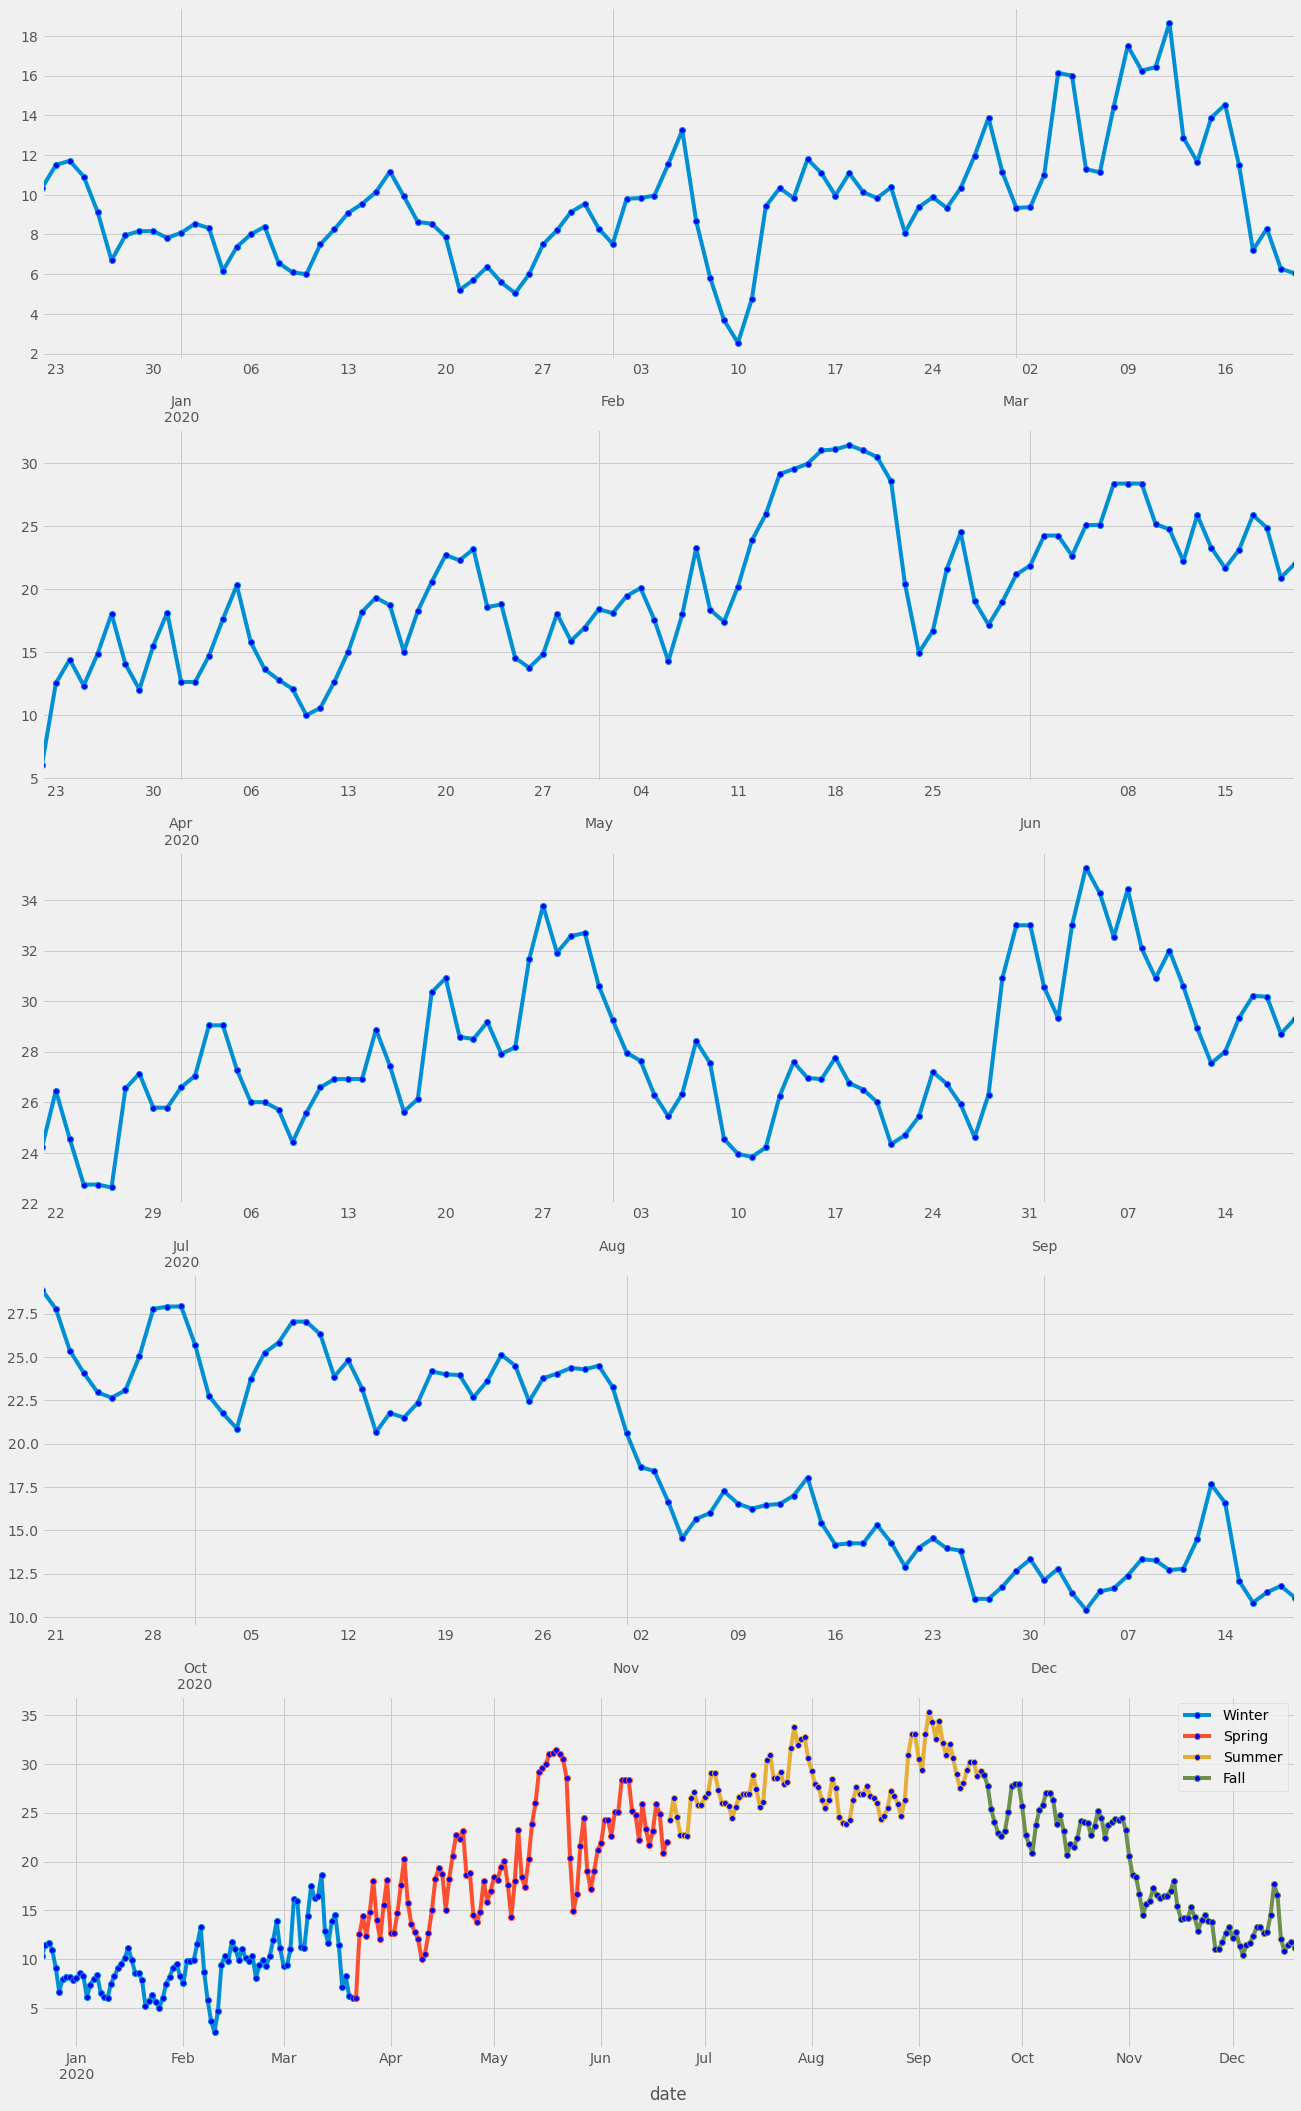

In [25]:
fig, axes= plt.subplots(5,1,figsize=(20,35))

temp_s=four_seasons.groupby(four_seasons.date).mean()

winter=temp_s.loc[temp_s.index<"2020-3-22","temp"]
spring=temp_s.loc[(temp_s.index>="2020-3-22") & (temp_s.index<="2020-6-20"),"temp"]
summer=temp_s.loc[(temp_s.index>="2020-6-21") & (temp_s.index<="2020-9-19"),"temp"]
fall=temp_s.loc[(temp_s.index>="2020-9-20") & (temp_s.index<="2020-12-19"),"temp"]

winter.plot(ax=axes[0],marker="o",markerfacecolor="b")
# axes[0].legend(["s"])
spring.plot(ax=axes[1],marker="o",markerfacecolor="b")
summer.plot(ax=axes[2],marker="o",markerfacecolor="b")
fall.plot(ax=axes[3],marker="o",markerfacecolor="b")

winter.plot(ax=axes[4],marker="o",markerfacecolor="b")
spring.plot(ax=axes[4],marker="o",markerfacecolor="b")
summer.plot(ax=axes[4],marker="o",markerfacecolor="b")
fall.plot(ax=axes[4],marker="o",markerfacecolor="b")

plt.legend(["Winter","Spring","Summer","Fall"])

set global variables instead of redundancy

In [ ]:
winter=four_seasons[four_seasons.date.dt.date <= pd.Timestamp("2020-3-20")]
winter.date=winter.date.dt.date

heatmap for the winter

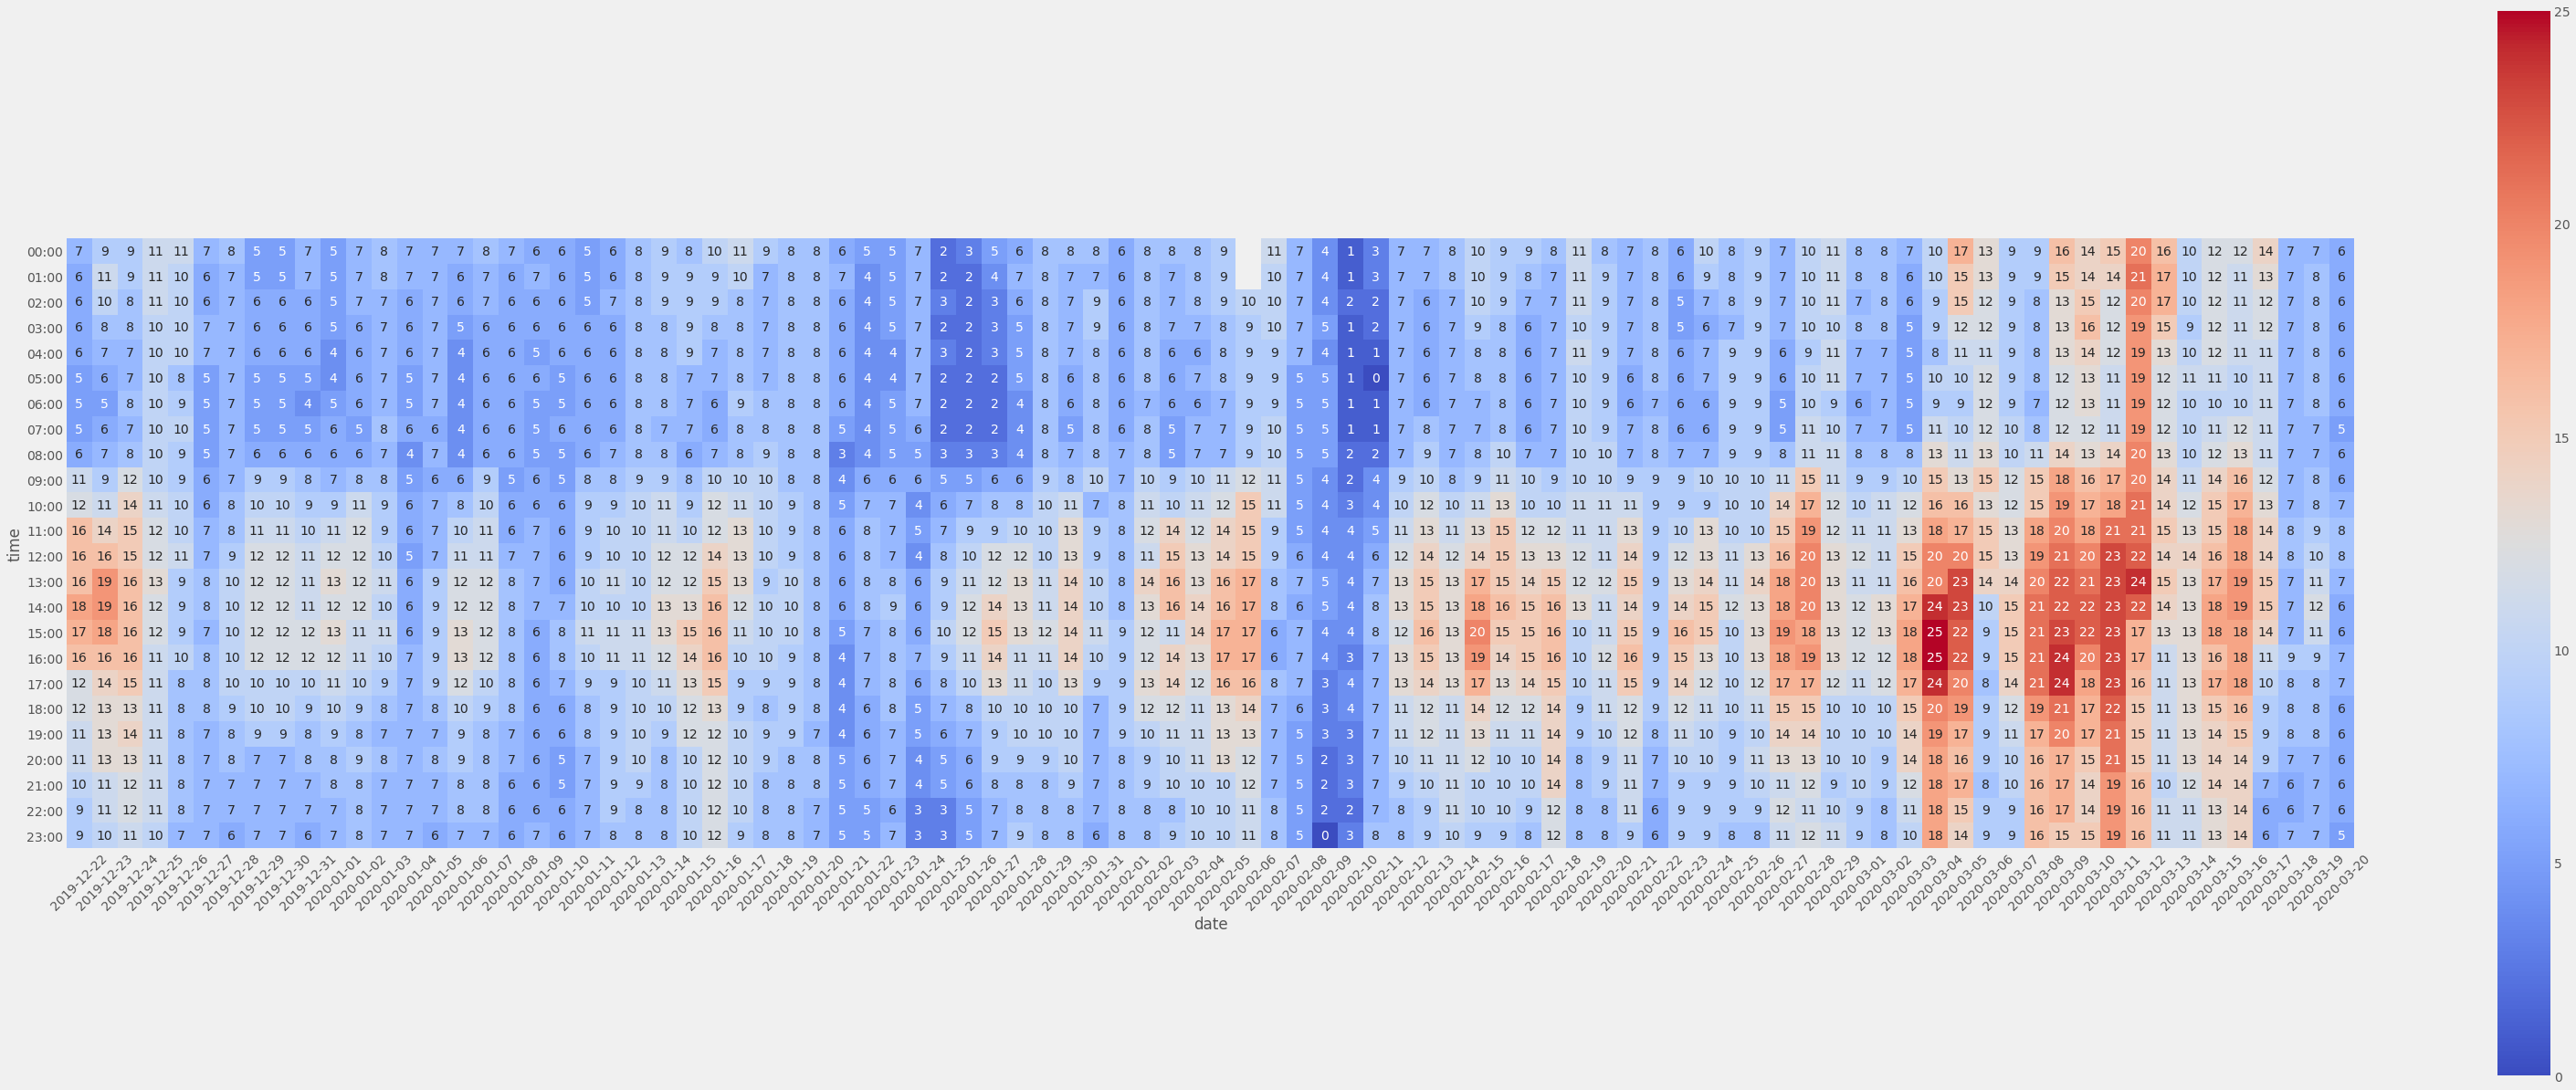

In [27]:
pivot_i=(winter.pivot_table(index="time",columns=winter.date,values="temp"))
# # fill missing values
pivot_i.fillna(method="ffill",inplace=True)
fig,ax=plt.subplots(figsize=(50,20))
x=sns.heatmap(pivot_i,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

In [28]:
# four_seasons.to_csv("seasons.csv",index=False)